In [1]:
# preliminaries
import numpy as np
import os
import matplotlib.pyplot as plt
import sys  
sys.path.insert(0, r'C:\Users\payto\hubbleconst')
%matplotlib inline

import sncosmo # we'll use this to get SN distances
import snana # we'll use this to read supernova light curve files
from astropy.io import fits
import astropy.units as u
from astropy.table import Table
import gzip
import warnings
import get_vpec
import LC_CLASS
# let's get ready to measure distances relative to
# a cosmological model with H0=70, cosmic matter = 0.3
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(70,0.3)

In [2]:
from os import listdir
from os.path import isfile, join
path = 'SNDATA_ROOT/research_payto/'
fileslist = [f for f in listdir(path) if isfile(join(path, f))]

In [3]:
fileslist

['1997bp.dat.gz',
 '1999cp.dat.gz',
 '1999dq.dat.gz',
 '2002dp.dat.gz',
 'CFA3_4SHOOTER2_2002cr.DAT',
 'CFA4_p1_2009Y.dat',
 'CFA4_p2_2009le.dat.gz',
 'CSPDR2_2006bh.dat.gz',
 'CSPDR2_2006D.dat',
 'Foundation_DR1_spec_PSNJ2043531.txt.gz']

In [13]:
sns = []
for path in [fileslist[4]]:
    file = os.path.expandvars('SNDATA_ROOT/research_payto/'+ path)
    print(file)
    sn_ = snana.SuperNova(file)
    sns.append(sn_)
    
    #file = open('research/' + path).readlines
    #novae = os.path.expandvars(file()[0])
    #novae_data = novae.data

SNDATA_ROOT/research_payto/CFA3_4SHOOTER2_2002cr.DAT


In [8]:
#for i in range(len(sns)):
    #print(sns[i].FLUXCAL,sns[i].FLT)
#for flux,flt in zip(sn.FLUXCAL,sn.FLT):
    #print(flux,flt)
#for j,f in enumerate(sn.FLUXCAL):
    #print(sn.FLT[j],flux)

In [6]:
for key in sns[0].__dict__.keys():
    print(key,getattr(sns[0],key))

datfile C:\Users\payto\SNDATA_ROOT\research_payto\1997bp.dat.gz
SURVEY CFA2
SNID 1997bp
IAUC UNKNOWN
RA 191.72396
DEC -11.64256
MWEBV 0.038 # MW E(B-V)
REDSHIFT_HELIO 0.00831 +- 0.00100
REDSHIFT_CMB 0.00944 +- 0.00114
VPEC 217.473
VPEC_ERR 250.0
REDSHIFT_Status warning: redshift err fudged
SEARCH_PEAKMJD 50549.969
FILTERS UBVRI
MJD [50546.29 50547.3  50548.29 50549.3  50550.26 50552.32 50567.27 50569.21
 50573.29 50575.23 50579.24 50597.23 50610.19 50546.29 50547.3  50548.29
 50549.3  50550.26 50552.32 50567.27 50569.21 50573.29 50575.23 50579.24
 50597.23 50610.19 50546.29 50547.3  50548.29 50549.3  50550.26 50552.32
 50567.27 50569.21 50573.29 50575.23 50579.24 50597.23 50610.19 50546.29
 50547.3  50548.29 50549.3  50550.26 50552.32 50567.27 50569.21 50573.29
 50575.23 50579.24 50597.23 50610.19 50546.29 50547.3  50548.29 50549.3
 50550.26 50552.32 50567.27 50569.21 50573.29 50575.23 50579.24 50597.23
 50610.19]
FLT ['Bessell-B/B' 'Bessell-B/B' 'Bessell-B/B' 'Bessell-B/B' 'Bessell-B/

PS1_LOWZ_COMBINED(CFA3S) ['wavelength (A)', 'CFA3S-U/a', 'CFA3S-B/b', 'CFA3S-V/c', 'CFA3S-R/d', 'CFA3S-I/e', 'CFA41-U/f', 'CFA41-B/g', 'CFA41-V/h', 'CFA41-r/i', 'CFA41-i/j', 'CFA41-U/k', 'CFA41-B/l', 'CFA41-V/m', 'CFA41-r/n', 'CFA41-i/o', 'CFA42-B/p', 'CFA42-V/q', 'CFA42-r/r', 'CFA42-i/s', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A', 'Bessell-U/B', 'Bessell-B/C', 'Bessell-V/D', 'Bessell-R/E', 'Bessell-I/F', 'Bessell-U/G', 'Bessell-B/H', 'Bessell-V/I', 'Bessell-R/J', 'Bessell-I/K', '*CFA3S-U/a', '*CFA3S-B/b', '*CFA3S-V/c', '*CFA3S-R/d', '*CFA3S-I/e', '*CFA41-U/f', '*CFA41-B/g', '*CFA41-V/h', '*CFA41-r/i', '*CFA41-i/j', '*CFA41-U/k', '*CFA41-B/l', '*CFA41-V/m', '*CFA41-r/n', '*CFA41-i/o', '*CFA42-B/p', '*CFA42-V/q', '*CFA42-r/r', '*CFA42-i/s', '*CSP-u/t', '*CSP-B/u', '*CSP-o/v', '*CSP-m/w', '*CSP-n/x', '*CSP-g/y', '*CSP-r/z', '*CSP-i/A', '*Bessell-U/B', '*Bessell-B/C', '*Bessell-V/D', '*Bessell-R/E', '*Bessell-I/F', '*Bessell-U/G', '*Bessell-B/H

KeyError: "Key 'a' does not exist."

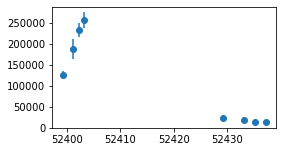

In [14]:
# dictionary mapping survey names to kcor files
def procedure(sn): 
    kcordict = {'CFA4p1':os.path.expandvars('$SNDATA_ROOT/kcor/PS1/Pantheon/kcor_PS1_LOWZ_COMBINED.fits.gz'),
                'CFA4p2':os.path.expandvars('$SNDATA_ROOT/kcor/PS1/Pantheon/kcor_PS1_LOWZ_COMBINED.fits.gz'),
                'CSP':os.path.expandvars('$SNDATA_ROOT/kcor/CSP/CSPDR3/kcor_CSPDR3_BD17.fits.gz'),
                'CFA2':os.path.expandvars('$SNDATA_ROOT/kcor/SALT3TRAIN_K21/kcor_Jha2006.fits'),
                'LOWZ':os.path.expandvars('$SNDATA_ROOT/kcor/SALT3TRAIN_K21/kcor_Jha2006.fits'),
                'PS1_LOWZ_COMBINED':os.path.expandvars('$SNDATA_ROOT/kcor/PS1/Pantheon/kcor_PS1_LOWZ_COMBINED.fits'),
                'FOUNDATION':os.path.expandvars('$SNDATA_ROOT/kcor/SALT3TRAIN_K21/kcor_Foundation_DR1.fits'),
                'CFA3':os.path.expandvars('$SNDATA_ROOT/kcor/SALT3TRAIN_K21/kcor_Hicken2009.fits'),
                'CFA3_4SHOOTER':os.path.expandvars('$SNDATA_ROOT/kcor/CFA/CFA3/kcor_CFA3_4SHOOTER_BD17.fits')}
    SURVEY_KEY = sn.SURVEY.split('(')[0]
    if SURVEY_KEY not in kcordict:
        print(f'COULD NOT FIND {sn.SURVEY} IN kcordict USING KEY {SURVEY_KEY}')
        return
    kcorfile = kcordict[SURVEY_KEY]
    kcor = fits.open(kcorfile)
    #for i,k in enumerate(kcor):
        #if i==0:
            #continue
        #print(k.data.names)
    print(sn.SURVEY,kcor[5].data.names)
        # cosmetic things
    plt.rcParams['figure.figsize'] = (4,12)
    plt.subplots_adjust(hspace=0.1)

    # plot the SN "light curve" for each band
    for i,filt in enumerate(np.unique(sn.FLT)):
        # subplot for each filter
        ax = plt.subplot(f"{len(np.unique(sn.FLT))}1{i+1}")

        # fluxes and errors
        ax.errorbar(sn.MJD[sn.FLT == filt],sn.FLUXCAL[sn.FLT == filt],yerr=sn.FLUXCALERR[sn.FLT == filt],fmt='o')

        # compute the effective wavelength so we know the "color" of each filter
        lameff = np.sum(kcor[5].data[filt]*kcor[5].data['wavelength (A)'])/kcor[5].data[filt].sum()
        # using ax.text instead of title makes the spacing better
        ax.text(0.05,0.25,f"{filt} ($\lambda_{{eff}} = {lameff:.0f} \AA$)",ha='left',va='center',transform=ax.transAxes,bbox={'facecolor':'1.0','edgecolor':'1.0'})

        # cosmetic stuff
        ax.set_xlabel('MJD')
        ax.set_ylabel('flux')
        ax.set_yticks([]) # absolute flux doesn't matter for now
    plt.show()
    flc=LC_CLASS.LC()
    res = LC_CLASS.salt3_lc_fit(flc, sn.datfile, kcordict[SURVEY_KEY])
for sn in sns:
    procedure(sn)